# Partie 2

## Initialisation du kernel

In [2]:
#!pip install --upgrade oracledb

import getpass
from os import getenv
import pandas as pd
import oracledb
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

  Using cached oracledb-2.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.1 MB)


In [3]:
# NÃ©cessaire pour Ã©viter les problÃ¨mes de session
class Connexion(object):
    def __init__(self, login, password):
        self.conn = oracledb.connect(
            user=login,
            password=password,
            host="oracle.iut-orsay.fr",
            port=1521,
            sid="etudom",
        )
        self.conn.autocommit = False

    def __enter__(self):
        self.conn.autocommit = False
        return self.conn

    def __exit__(self, *args):
        self.conn.close()

In [4]:
# La fonction ci-dessous est Ã  utiliser pour exÃ©cuter une requÃªte et stocker les rÃ©sultats dans un dataframe Pandas sans afficher dâ€™alerte.
# Vous pouvez vous en inspirer pour crÃ©er vos propres fonctions.
def requete_vers_dataframe(connexion_data, requete, valeurs = None):
    with Connexion(login=connexion_data['login'], password=connexion_data['password']) as connexion:
        warnings.simplefilter(action='ignore', category=UserWarning)
        if valeurs is not None:
            df = pd.read_sql(requete, connexion, params=valeurs)
        else:
            df = pd.read_sql(requete, connexion)
        warnings.simplefilter("always") 
        return df

In [5]:
# Saisir ci-dessous l'Ã©dition des JO qui vous a Ã©tÃ© attribuÃ©e. Cela correspond au LibelleHote dans la table HOTE de la base de donnÃ©es
# Par exemple EDITION_JO = "2020 Summer Olympics"
EDITION_JO = "1976 Summer Olympics"
# Saisir ci-dessous le login court de la base utilisÃ©e pour votre carnet
SCHEMA = "TPLUMAS"

In [6]:
# On demande Ã  l'utilisateur son login et mot de passe pour pouvoir accÃ©der Ã  la base de donnÃ©es
if getenv("DB_LOGIN") is None:
    login = input("Login : ")
else:
    login = getenv("DB_LOGIN")
if getenv("DB_PASS") is None:
    password = getpass.getpass("Mot de passe : ")
else:
    password = getenv("DB_PASS")
conn = {'login': login, 'password': password}

In [7]:
# On vÃ©rifie que l'utilisateur est bien connectÃ© Ã  la base de donnÃ©es, que le schÃ©ma est bon, et qu'on trouve la bonne Ã©dition des JO
data = requete_vers_dataframe(conn, f"SELECT * FROM {SCHEMA}.HOTE WHERE LibelleHote LIKE (:libelle)",{"libelle":EDITION_JO})
id_hote = int(data.IDHOTE.iloc[0])
print(f"Identifiant de lâ€™hÃ´te : {id_hote}")

Identifiant de lâ€™hÃ´te : 19


## PrÃ©sentation des jeux olympique

### Contextualisation de l'Ã©dition des JO

Les Jeux Olympique de 1976 se sont dÃ©roulÃ©s Ã  MontrÃ©al au Canada. Ils se sont dÃ©roulÃ©s du 17 juillet 1976 au 1 aoÃ»t 1976.

Voici les diffÃ©rents lieux du site

<style>
    img{
        display: block;
        width: 60%;
        height: 60%;
        margin-left: auto;
        margin-right: auto;
    }
</style>

![img](https://img.olympics.com/images/image/private/t_s_16_9_g_auto/t_s_w1920/f_auto/primary/sfbgpwrndfqjeelbk0ug)


Ce sont les premiers jeux au Canada.
A noter que cette Ã©dition a vu 22 pays boycottÃ©s cette Ã©dition car la Nouvelle-ZÃ©lande avait envoyÃ© sa dÃ©lÃ©gation de rugby jouÃ© un match en Afrique du Sud, pays sous l'apartheid a cette Ã©poque.


### Information gÃ©nÃ©ral de cette Ã©dition des JO

Il y a eu 6028 athlÃ¨tes durant ces jo, avec 4781 hommes et 1247 femmes.
21 sports, 27 disciplines et 128 Ã©preuves diffÃ©ntes durant cette Ã©dition. 

Voici quelques statisques plus dÃ©taillÃ©s

In [8]:
requete = f"""
    SELECT 
        nomEvenement
    FROM 
        {SCHEMA}.EVENEMENT E
    INNER JOIN
        {SCHEMA}.HOTE H
    ON
        e.idHote = h.idHote
        
    WHERE
        libelleHote = '{EDITION_JO}'
"""

In [9]:
data = requete_vers_dataframe(conn,requete)
print("Voici la liste de toutes les Ã©preuves")
data

Voici la liste de toutes les Ã©preuves


,NOMEVENEMENT
0,"200 metres, Men"
1,"400 metres, Men"
2,"110 metres Hurdles, Men"
3,"400 metres Hurdles, Men"
4,"4 Ã— 100 metres Relay, Men"
...,...
193,"Featherweight, Greco-Roman, Men"
194,"Heavyweight, Greco-Roman, Men"
195,"Lightweight, Men"
196,"Middle-Heavyweight, Men"


In [10]:
requete=f"""
SELECT DISTINCT
    nomDiscipline
FROM
    {SCHEMA}.DISCIPLINE D
INNER JOIN
    {SCHEMA}.EVENEMENT E
ON 
    d.codeDiscipline = e.codeDiscipline
INNER JOIN
    {SCHEMA}.HOTE H
ON
    e.idHote = h.idHote
WHERE
    libelleHote = '{EDITION_JO}'
"""

In [11]:
data = requete_vers_dataframe(conn,requete)
print("Voici la liste de toutes les disciplines")
data

Voici la liste de toutes les disciplines


,NOMDISCIPLINE
0,Athletics
1,Boxing
2,Cycling Track
3,Equestrian Dressage
4,Swimming
5,Wrestling
6,Basketball
7,Canoe Sprint
8,Modern Pentathlon
9,Volleyball


In [12]:
requete=f"""
SELECT DISTINCT
    nomSport
FROM
    {SCHEMA}.SPORT S
INNER JOIN
    {SCHEMA}.DISCIPLINE D
ON 
    s.codeSport = d.codeSport
INNER JOIN
    {SCHEMA}.EVENEMENT E
ON
    d.codeDiscipline = e.codeDiscipline
INNER JOIN
    {SCHEMA}.HOTE H
ON
    e.idHote = h.idHote
WHERE
    libelleHote = '{EDITION_JO}'
"""

In [13]:
data=requete_vers_dataframe(conn,requete)
print("Voici la liste des sports")
data

Voici la liste des sports


,NOMSPORT
0,Athletics
1,Boxing
2,Wrestling
3,Basketball
4,Modern Pentathlon
5,Volleyball
6,Cycling
7,Hockey
8,Judo
9,Shooting


In [14]:
requete = f"""

SELECT 
    COUNT(DISTINCT noc) AS NB
FROM
    (
        SELECT PI.noc,idEvent
        FROM {SCHEMA}.PARTICIPATION_INDIVIDUELLE PI
        UNION
        SELECT e.noc,idEvenement
        FROM {SCHEMA}.PARTICIPATION_EQUIPE PE
        INNER JOIN {SCHEMA}.EQUIPE E ON PE.idEquipe = E.idEquipe
    )
INNER JOIN
    {SCHEMA}.EVENEMENT E ON idEvent = E.idEvenement
INNER JOIN
    {SCHEMA}.HOTE H ON E.idHote = H.idHote
WHERE
    H.libelleHote = '{EDITION_JO}'
"""


In [15]:
nbPays=requete_vers_dataframe(conn,requete).NB.iloc[0]
print(f"nombre de pays : {nbPays}")

nombre de pays : 92


### Quelques statistiques concernant cette Ã©dition

In [16]:
'''
TODO : voici les statistique Ã  faire

- proportion des mÃ©dailes remportÃ©s par NOC
- Ã©preuve, discipline, sport ayant le plus d'athlÃ¨te
- rÃ©partition des diffÃ©rentes catÃ©gorie d'Ã©preuve (genre tant de pourcent d'Ã©preuve)

'''

"\nTODO : voici les statistique Ã  faire\n\n- proportion en pourcentage sur homme femme\n- proportion des mÃ©dailes remportÃ©s par NOC\n- Ã©preuve, discipline, sport ayant le plus d'athlÃ¨te\n- trouver les nouvelles Ã©preuves\n- que veux-dire rÃ©partition par genre ?\n- rÃ©partition des diffÃ©rentes catÃ©gorie d'Ã©preuve (genre tant de pourcent d'Ã©preuve)\n\n"

In [32]:
requete=f"""
WITH participation_combinee AS (
    SELECT
        pi.IdAthlete AS IdParticipant,
        pi.Resultat,
        pi.Medaille,
        pi.NOC,
        pi.IdEvent AS IdEvenement
    FROM
        {SCHEMA}.PARTICIPATION_INDIVIDUELLE PI
    UNION ALL
    SELECT
        ce.IdAthlete AS IdParticipant,
        pe.Resultat,
        pe.Medaille,
        eq.NOC,
        pe.IdEvenement
    FROM
        {SCHEMA}.PARTICIPATION_EQUIPE PE
    INNER JOIN
        {SCHEMA}.COMPOSITION_EQUIPE CE ON PE.IdEquipe = CE.IdEquipe
    INNER JOIN
        {SCHEMA}.EQUIPE EQ ON CE.IdEquipe = EQ.IdEquipe
)

SELECT
    COUNT(CASE WHEN genre = 'Male' THEN 1 END) * 100.0 / COUNT(*) AS homme,
    COUNT(CASE WHEN genre = 'Female' THEN 1 END) * 100.0 / COUNT(*) AS femme
FROM 
    {SCHEMA}.ATHLETE A
INNER JOIN
    participation_combinee P
ON
    IdParticipant = a.idAthlete
INNER JOIN
    EPREUVEJOMONTREAL E
ON
    e.IDEVENEMENT = p.IDEVENEMENT"""

In [37]:
data=requete_vers_dataframe(conn,requete)

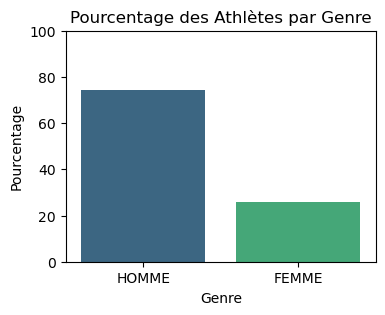

In [34]:
df = pd.DataFrame(data)

# Ã‰tape 2 : PrÃ©parer les donnÃ©es pour le diagramme en bÃ¢tons
df_melted = df.melt(var_name='Genre', value_name='Pourcentage')

# Ã‰tape 3 : CrÃ©er le diagramme en bÃ¢tons
plt.figure(figsize=(4, 3))
sns.barplot(x='Genre', y='Pourcentage', data=df_melted, palette='viridis')
plt.title('Pourcentage des AthlÃ¨tes par Genre')
plt.ylabel('Pourcentage')
plt.xlabel('Genre')
plt.ylim(0, 100)
plt.show()

In [76]:
requete=f"""
SELECT NOMEVENEMENT AS "Nouvelle Ã©preuve"
FROM TPLUMAS.EVENEMENT E
INNER JOIN TPLUMAS.HOTE H ON E.IDHOTE=h.IDHOTE
WHERE h.ANNEEHOTE = 1976
MINUS
SELECT NOMEVENEMENT
FROM TPLUMAS.EVENEMENT E
INNER JOIN TPLUMAS.HOTE H ON E.IDHOTE=h.IDHOTE
WHERE h.ANNEEHOTE = 1972
"""
requeteBis=f"""
SELECT COUNT(*) AS NBEPREUVE
FROM 
    (
        SELECT NOMEVENEMENT
        FROM TPLUMAS.EVENEMENT E
        INNER JOIN TPLUMAS.HOTE H ON E.IDHOTE=h.IDHOTE
        WHERE h.ANNEEHOTE = 1976
        MINUS
        SELECT NOMEVENEMENT
        FROM TPLUMAS.EVENEMENT E
        INNER JOIN TPLUMAS.HOTE H ON E.IDHOTE=h.IDHOTE
        WHERE h.ANNEEHOTE = 1972
    )
"""

In [77]:
dataBis=requete_vers_dataframe(conn,requeteBis)
print(f"Nombre de nouvelles Ã©preuves dans cette Ã©dition : {dataBis.NBEPREUVE.iloc[0]}")


Nombre de nouvelles Ã©preuves dans cette Ã©dition : 18


In [78]:
data=requete_vers_dataframe(conn,requete)
print("Nouvelle Ã©preuve de l'Ã©dition")
data

Nouvelle Ã©preuve de l'Ã©dition


,Nouvelle Ã©preuve
0,"1,000 metres, Men"
1,"4 Ã— 5 kilometres Relay, Women"
2,"Basketball, Women"
3,"Canadian Doubles, 500 metres, Men"
4,"Canadian Singles, 500 metres, Men"
5,"Coxed Fours, Women"
6,"Coxed Quadruple Sculls, Women"
7,"Coxless Pairs, Women"
8,"Double Sculls, Women"
9,"Eights, Women"


In [126]:
requete=f"""
    SELECT 
        COUNT(CASE WHEN nomEvenement LIKE '%Men%' THEN 1 END) * 100.0 / COUNT(*) AS "ratio epreuve homme",
        COUNT(CASE WHEN nomEvenement LIKE '%Women%' THEN 1 END) * 100.0 / COUNT(*) AS "ratio epreuve femme",
        COUNT(CASE WHEN nomEvenement LIKE '%Mixed%' THEN 1 END) + COUNT(CASE WHEN nomEvenement LIKE '%Open%' THEN 1 END) * 100.0 / COUNT(*) AS "ratio epreuve mixe"
    FROM TPLUMAS.EVENEMENT E
    INNER JOIN TPLUMAS.HOTE H ON E.IDHOTE=h.IDHOTE
    WHERE h.ANNEEHOTE = 1976
"""

In [129]:
data=requete_vers_dataframe(conn,requete)

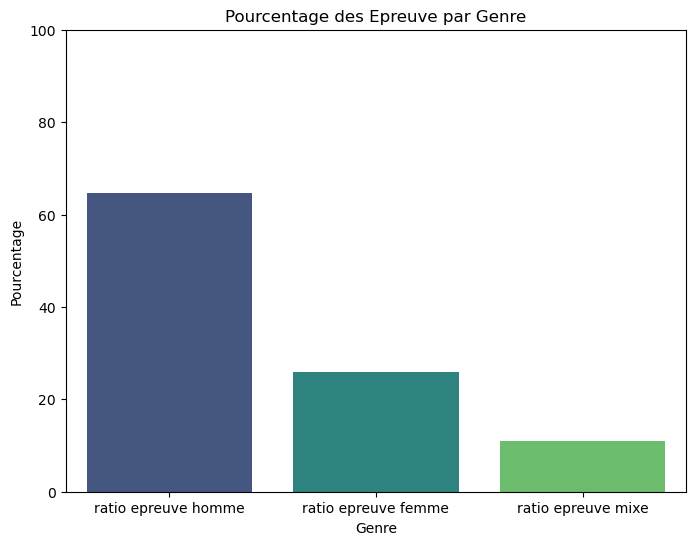

In [130]:
df = pd.DataFrame(data)

# Ã‰tape 2 : PrÃ©parer les donnÃ©es pour le diagramme en bÃ¢tons
df_melted = df.melt(var_name='Genre', value_name='Pourcentage')

# Ã‰tape 3 : CrÃ©er le diagramme en bÃ¢tons
plt.figure(figsize=(8, 6))
sns.barplot(x='Genre', y='Pourcentage', data=df_melted, palette='viridis')
plt.title('Pourcentage des Epreuve par Genre')
plt.ylabel('Pourcentage')
plt.xlabel('Genre')
plt.ylim(0, 100)
plt.show()

In [117]:
requeteBis=f"""
WITH participation_combinee AS (
    SELECT
        pi.IdAthlete AS IdParticipant,
        pi.Resultat,
        pi.Medaille,
        pi.NOC,
        pi.IdEvent AS IdEvenement
    FROM
        {SCHEMA}.PARTICIPATION_INDIVIDUELLE PI
    UNION ALL
    SELECT
        ce.IdAthlete AS IdParticipant,
        pe.Resultat,
        pe.Medaille,
        eq.NOC,
        pe.IdEvenement
    FROM
        {SCHEMA}.PARTICIPATION_EQUIPE PE
    INNER JOIN
        {SCHEMA}.COMPOSITION_EQUIPE CE ON PE.IdEquipe = CE.IdEquipe
    INNER JOIN
        {SCHEMA}.EQUIPE EQ ON CE.IdEquipe = EQ.IdEquipe
)
SELECT COUNT(*) AS NBEPREUVE
FROM 
    (
        SELECT nomNOc AS "Nouveau pays"
        FROM TPLUMAS.NOC N
        INNER JOIN participation_combinee PC ON n.codeNoc = pc.Noc
        INNER JOIN EPREUVEJOMONTREAL EM ON pc.idEvenement = em.idEvenement
        MINUS
        SELECT nomNOc
        FROM TPLUMAS.NOC N
        INNER JOIN participation_combinee PC ON n.codeNoc = pc.Noc
        INNER JOIN {SCHEMA}.EVENEMENT E ON e.idEvenement = pc.idEvenement
        INNER JOIN {SCHEMA}.HOTE H ON e.idHote = e.idHote
        WHERE h.ANNEEHOTE = 1972
    )
"""

In [118]:
dataBis=requete_vers_dataframe(conn,requeteBis)
print(f"Nombre de nouvelles nation dans cette Ã©dition : {dataBis.NBEPREUVE.iloc[0]}")

Nombre de nouvelles nation dans cette Ã©dition : 0


## Comparaison avec les éditons précédantes

### Classement par équipe

In [129]:
# RequÃªte SQL pour calculer les mÃ©dailles par pays
query = """
WITH participation_combinee AS (
    SELECT
        pi.NOC,
        pi.Medaille,
        pi.IdEvent AS IdEvenement
    FROM
        PARTICIPATION_INDIVIDUELLE pi
    UNION ALL
    SELECT
        eq.NOC,
        pe.Medaille,
        pe.IdEvenement
    FROM
        PARTICIPATION_EQUIPE pe
    JOIN
        EQUIPE eq ON pe.IdEquipe = eq.IdEquipe
)
SELECT
    PC.NOC,
    SUM(CASE WHEN PC.Medaille = 'Gold' THEN 1 ELSE 0 END) AS Gold,
    SUM(CASE WHEN PC.Medaille = 'Silver' THEN 1 ELSE 0 END) AS Silver,
    SUM(CASE WHEN PC.Medaille = 'Bronze' THEN 1 ELSE 0 END) AS Bronze,
    COUNT(PC.Medaille) AS Total
FROM
    participation_combinee PC
JOIN
    TPLUMAS.EVENEMENT E ON PC.IdEvenement = E.IdEvenement
JOIN
    TPLUMAS.HOTE H ON E.IdHote = H.IdHote
WHERE
    H.IdHote < 20
GROUP BY
    PC.NOC
ORDER BY
    Total DESC, Gold DESC, Silver DESC, Bronze DESC
"""

# ExÃ©cuter la requÃªte et rÃ©cupÃ©rer les donnÃ©es
data_classement = requete_vers_dataframe(conn, query)

# Afficher le tableau des mÃ©dailles par pays
data_classement.iloc[0:10]




,NOC,GOLD,SILVER,BRONZE,TOTAL
0,USA,626,477,431,1534
1,URS,260,219,204,683
2,GBR,153,189,160,502
3,FRA,128,148,148,424
4,SWE,124,121,145,390
5,GER,103,139,128,370
6,ITA,117,106,101,324
7,HUN,105,92,114,311
8,FIN,91,72,98,261
9,JPN,73,64,63,200


### Graphe sÃ©parant les medailles gagnÃ© par pays et par genre

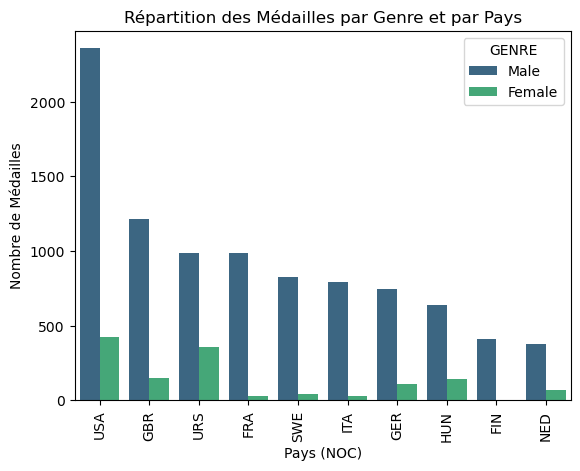

In [178]:
# RequÃªte SQL pour obtenir les mÃ©dailles par genre
query_gender = """
WITH participation_combinee AS (
    SELECT
        pi.NOC,
        pi.Medaille,
        a.Genre,
        pi.IdEvent AS IdEvenement
    FROM
        PARTICIPATION_INDIVIDUELLE pi
    JOIN
        ATHLETE a ON pi.IdAthlete = a.IdAthlete
    UNION ALL
    SELECT
        eq.NOC,
        pe.Medaille,
        a.Genre,
        pe.IdEvenement
    FROM
        PARTICIPATION_EQUIPE pe
    JOIN
        COMPOSITION_EQUIPE ce ON pe.IdEquipe = ce.IdEquipe
    JOIN
        EQUIPE eq ON ce.IdEquipe = eq.IdEquipe
    JOIN
        ATHLETE a ON ce.IdAthlete = a.IdAthlete
)
SELECT
    NOC,
    Genre,
    SUM(CASE WHEN Medaille = 'Gold' THEN 1 ELSE 0 END) AS Gold,
    SUM(CASE WHEN Medaille = 'Silver' THEN 1 ELSE 0 END) AS Silver,
    SUM(CASE WHEN Medaille = 'Bronze' THEN 1 ELSE 0 END) AS Bronze,
    COUNT(Medaille) AS Total
FROM
    participation_combinee PC
JOIN
    TPLUMAS.EVENEMENT E ON PC.IdEvenement = E.IdEvenement
JOIN
    TPLUMAS.HOTE H ON E.IdHote = H.IdHote
WHERE
    H.IdHote < 20

GROUP BY
    NOC, Genre
ORDER BY
    Total DESC, Gold DESC, Silver DESC, Bronze DESC
"""

# ExÃ©cuter la requÃªte et rÃ©cupÃ©rer les donnÃ©es
data_gender_medals = requete_vers_dataframe(conn, query_gender)

top_countries = data_gender_medals.groupby('NOC')['TOTAL'].sum().nlargest(10).index
data_top_countries = data_gender_medals[data_gender_medals['NOC'].isin(top_countries)]

# Plot the data
sns.barplot(x='NOC', y='TOTAL', hue='GENRE', data=data_top_countries, palette='viridis')
plt.title('RÃ©partition des MÃ©dailles par Genre et par Pays')
plt.xlabel('Pays (NOC)')
plt.ylabel('Nombre de MÃ©dailles')
plt.xticks(rotation=90, fontsize=10)  # Reduced font size for x-axis labels
plt.show()

Les femmes, par manque de reprÃ©sentation sportive, n'ont gagnÃ© que peu de mÃ©dailles comparÃ© aux hommes voir aucun comme pour la Finlande

### Ã©volution Ã  long terme pour le top 3 de cette Ã©dition par rapport aux Ã©dition prÃ©cÃ©dente

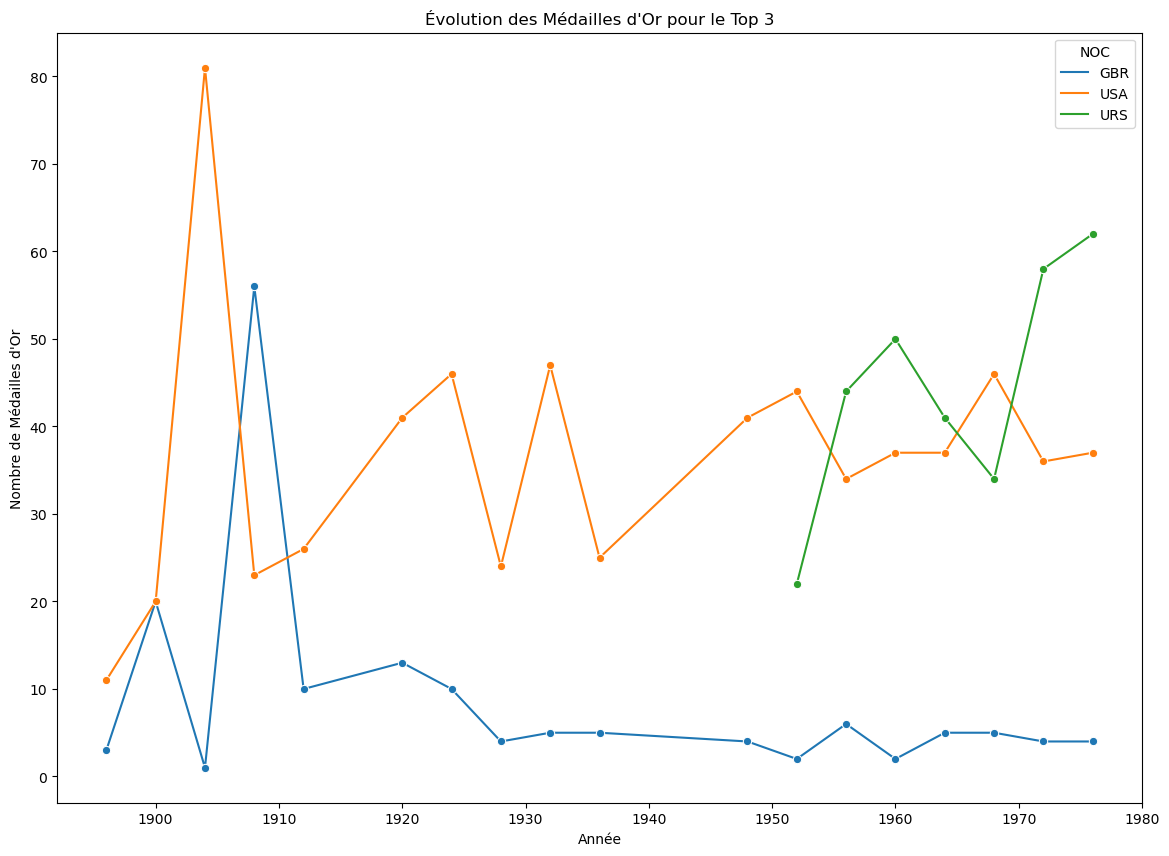

In [176]:
# Top 3 pays de cette Ã©dition
top_3_countries = data_classement.head(3)['NOC'].tolist()
top_3_countries_str = ', '.join(f"'{country}'" for country in top_3_countries)

# RequÃªte SQL pour obtenir l'Ã©volution des mÃ©dailles pour le top 3
query_evolution = f"""
WITH participation_combinee AS (
    SELECT
        h.AnneeHote,
        pi.NOC,
        pi.Medaille
    FROM
        PARTICIPATION_INDIVIDUELLE pi
    JOIN
        EVENEMENT e ON pi.IdEvent = e.IdEvenement
    JOIN
        HOTE h ON e.IdHote = h.IdHote
    UNION ALL
    SELECT
        h.AnneeHote,
        eq.NOC,
        pe.Medaille
    FROM
        PARTICIPATION_EQUIPE pe
    JOIN
        EQUIPE eq ON pe.IdEquipe = eq.IdEquipe
    JOIN
        EVENEMENT e ON pe.IdEvenement = e.IdEvenement
    JOIN
        HOTE h ON e.IdHote = h.IdHote
)
SELECT
    AnneeHote,
    NOC,
    SUM(CASE WHEN Medaille = 'Gold' THEN 1 ELSE 0 END) AS Gold,
    SUM(CASE WHEN Medaille = 'Silver' THEN 1 ELSE 0 END) AS Silver,
    SUM(CASE WHEN Medaille = 'Bronze' THEN 1 ELSE 0 END) AS Bronze,
    COUNT(Medaille) AS Total
FROM
    participation_combinee
WHERE
    NOC IN ({top_3_countries_str}) AND AnneeHote <= 1976
GROUP BY
    AnneeHote, NOC
ORDER BY
    AnneeHote
"""

# ExÃ©cuter la requÃªte et rÃ©cupÃ©rer les donnÃ©es
data_evolution = requete_vers_dataframe(conn, query_evolution)

# Afficher l'Ã©volution des mÃ©dailles pour le top 3
plt.figure(figsize=(14, 10))
sns.lineplot(x='ANNEEHOTE', y='GOLD', hue='NOC', data=data_evolution, marker='o')
plt.title('Ã‰volution des MÃ©dailles d\'Or pour le Top 3')
plt.xlabel('AnnÃ©e')
plt.ylabel('Nombre de MÃ©dailles d\'Or')
plt.show()

La grande bretagne aprÃ¨s avoir obtenu son maximum de mÃ©dailles en 1910, a commencÃ© Ã  gagner moins de 10 mÃ©dailles Ã  partir de 1925. Les USA quant Ã  eux a la meme date,
oscille entre 20 et 50 mÃ©dailles et tend vers environ 35 mÃ©dailles. Pour finir l'URSS  est en constante augmentation dÃ©s son entrÃ©e dans les JO pour atteindre son 
maximum lors de cette Ã©diton avec environ 60 mÃ©dailles remportÃ©es.


### L'Ã¢ge des athlÃ¨tes

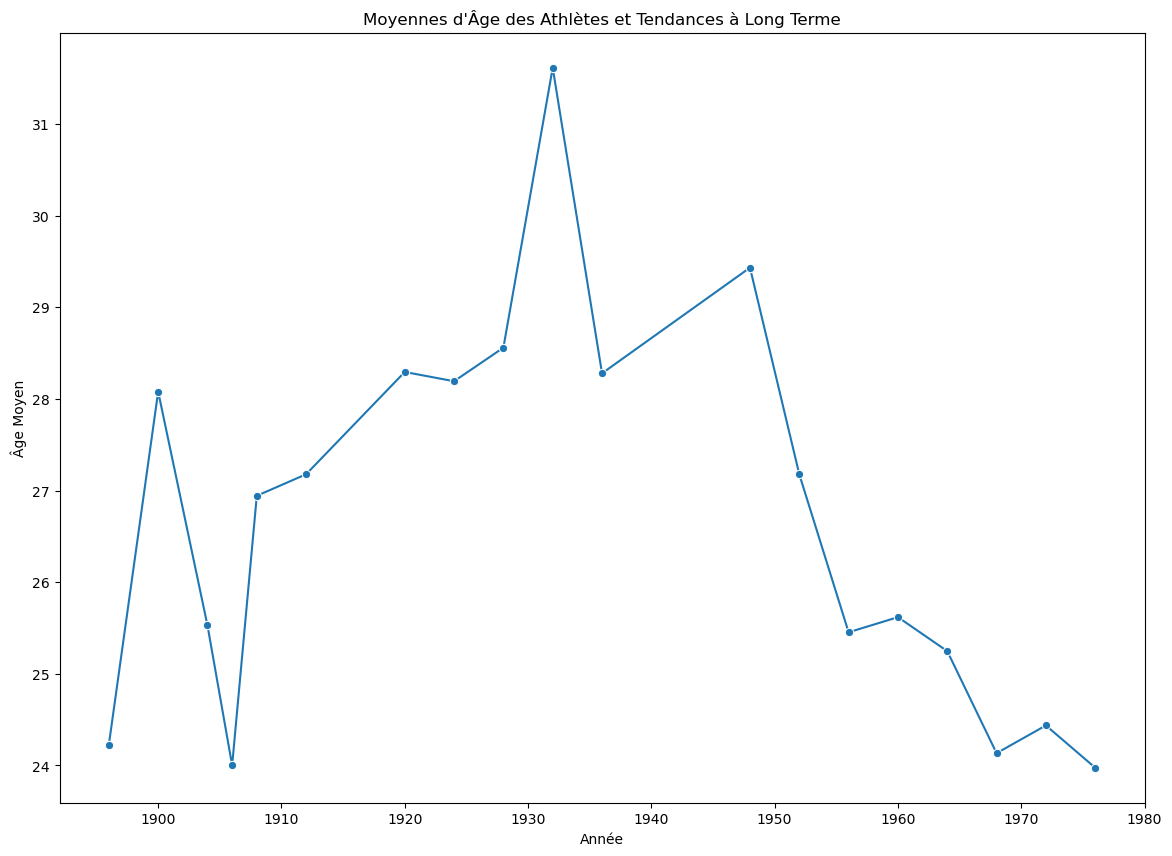

In [112]:
# RequÃªte SQL pour obtenir l'Ã¢ge des athlÃ¨tes
query_age = """
SELECT
    h.AnneeHote,
    a.DateNaissance,
    a.Genre
FROM
    ATHLETE a
JOIN
    PARTICIPATION_INDIVIDUELLE pi ON a.IdAthlete = pi.IdAthlete
JOIN
    EVENEMENT e ON pi.IdEvent = e.IdEvenement
JOIN
    HOTE h ON e.IdHote = h.IdHote
WHERE H.IdHote<20
"""

# ExÃ©cuter la requÃªte et rÃ©cupÃ©rer les donnÃ©es
data_age = requete_vers_dataframe(conn, query_age)

# Calculer l'Ã¢ge moyen des athlÃ¨tes par annÃ©e
data_age['AGE'] = data_age['ANNEEHOTE'] - pd.to_datetime(data_age['DATENAISSANCE']).dt.year
age_trend = data_age.groupby('ANNEEHOTE')['AGE'].mean().reset_index()

# Afficher les moyennes d'Ã¢ge des athlÃ¨tes
plt.figure(figsize=(14, 10))
sns.lineplot(x='ANNEEHOTE', y='AGE', data=age_trend, marker='o')
plt.title('Moyennes d\'Ã‚ge des AthlÃ¨tes et Tendances Ã  Long Terme')
plt.xlabel('AnnÃ©e')
plt.ylabel('Ã‚ge Moyen')
plt.show()




L'Ã©dition avec le plus de doyens Ã©tait celle de 1932 avec une moyenne d'age de 31.5 anspuis ne cesse de diminuer depuis cette Ã©dition pour atteindre une moyenne d'age de 24ans environ pour celle actuelle.

### FÃ©minisation : nombre d'athlÃ¨tes femme

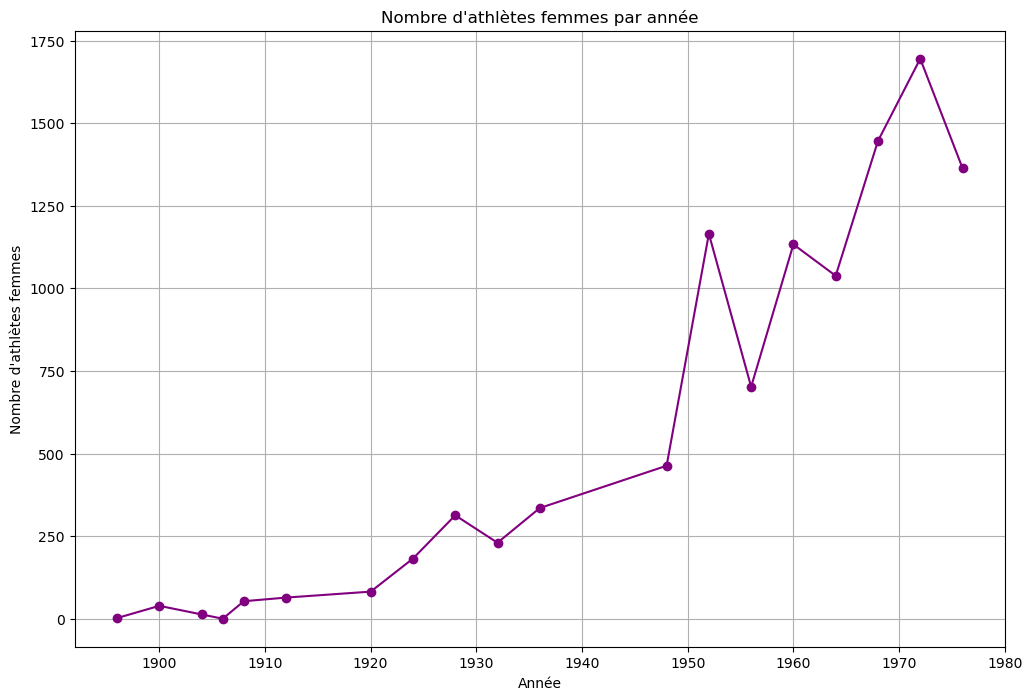

In [115]:
# RequÃªte SQL pour obtenir le nombre d'athlÃ¨tes femmes par annÃ©e
query_female_athletes = """
SELECT
    h.AnneeHote,
    COUNT(CASE WHEN a.Genre = 'Female' THEN 1 END) AS FemaleAthletes
FROM
    ATHLETE a
JOIN
    PARTICIPATION_INDIVIDUELLE pi ON a.IdAthlete = pi.IdAthlete
JOIN
    EVENEMENT e ON pi.IdEvent = e.IdEvenement
JOIN
    HOTE h ON e.IdHote = h.IdHote
WHERE H.IdHote<20
GROUP BY
    h.AnneeHote
"""

data_female_athletes = requete_vers_dataframe(conn, query_female_athletes)

# Assurez-vous que 'AnneeHote' est un entier pour le tri
data_female_athletes['ANNEEHOTE'] = data_female_athletes['ANNEEHOTE'].astype(int)

# Trier par annÃ©e
data_female_athletes.sort_values(by='ANNEEHOTE', inplace=True)

# CrÃ©er un graphique pour le nombre d'athlÃ¨tes femmes par annÃ©e
plt.figure(figsize=(12, 8))
plt.plot(data_female_athletes['ANNEEHOTE'], data_female_athletes['FEMALEATHLETES'], marker='o', linestyle='-', color='purple')
plt.title('Nombre d\'athlÃ¨tes femmes par annÃ©e')
plt.xlabel('AnnÃ©e')
plt.ylabel('Nombre d\'athlÃ¨tes femmes')
plt.grid(True)
plt.show()



Le nombre d'athlÃ¨tes femme ne cesse d'augmenter depuis 1910 pour atteindre son pic en 1972 avec un peu moins de 1750 athÃ¨tes puis redescendre Ã  1375 athlÃ¨tes pour l'Ã©dition actuelle.

## Performance de l'Ã©quipe de notre choix

La nationnalité choisie est celle des Philippines

Lors des Jeux olympiques d'Ã©tÃ© de 1976, les Philippines avaient 14 athlÃ¨tes concourant.

In [22]:
#RequÃªte SQL pour trouver le pays avec le moins d'athlÃ¨tes
requete = """
WITH athletes AS (
    SELECT
        A.IdAthlete,
        N.CodeNOC,
        N.NomNOC,
        'Individuel' AS TypeParticipation
    FROM
        Athlete A
    JOIN
        Participation_Individuelle PI ON A.IdAthlete = PI.IdAthlete
    JOIN
        NOC N ON PI.NOC = N.CodeNOC
    JOIN
        Evenement E ON PI.IdEvent = E.IdEvenement
    JOIN
        Hote H ON E.IdHote = H.IdHote
    WHERE
        H.LibelleHote LIKE :Libelle
    UNION ALL
    SELECT
        A.IdAthlete,
        N.CodeNOC,
        N.NomNOC,
        'Equipe' AS TypeParticipation
    FROM
        Athlete A
    JOIN
        Composition_Equipe CE ON A.IdAthlete = CE.IdAthlete
    JOIN
        Equipe EQ ON CE.IdEquipe = EQ.IdEquipe
    JOIN
        NOC N ON EQ.NOC = N.CodeNOC
    JOIN
        Participation_Equipe PE ON EQ.IdEquipe = PE.IdEquipe
    JOIN
        Evenement E ON PE.IdEvenement = E.IdEvenement
    JOIN
        Hote H ON E.IdHote = H.IdHote
    WHERE
        H.LibelleHote LIKE :Libelle
)
SELECT
    CodeNOC,
    NomNOC,
    COUNT(DISTINCT IdAthlete) AS NbAthletes
FROM
    athletes
WHERE CodeNOC = 'PHI'
GROUP BY
    CodeNOC, NomNOC
ORDER BY
    NbAthletes ASC
FETCH FIRST 1 ROWS ONLY
"""

#ExÃ©cuter la requÃªte et rÃ©cupÃ©rer les donnÃ©es
data = requete_vers_dataframe(conn, requete, {"Libelle": EDITION_JO})

#Afficher le rÃ©sultat
data

,CODENOC,NOMNOC,NBATHLETES
0,PHI,Philippines,14


In [13]:
requete = """
SELECT pi.idAthlete,resultat,medaille,noc
        FROM TPLUMAS.PARTICIPATION_INDIVIDUELLE PI
        UNION
        SELECT pe.IDEQUIPE,resultat,medaille,noc
        FROM TPLUMAS.PARTICIPATION_EQUIPE PE
        INNER JOIN TPLUMAS.EQUIPE E ON PE.idEquipe = E.idEquipe
"""
#ExÃ©cuter la requÃªte et rÃ©cupÃ©rer les donnÃ©es
data = requete_vers_dataframe(conn, requete)

#Afficher le rÃ©sultat
data

,IDATHLETE,RESULTAT,MEDAILLE,NOC
0,1,=17,None,FRA
1,1,=32,None,FRA
2,1,=5,None,AFG
3,2,=17,None,AFG
4,2,=17,None,FRA
...,...,...,...,...
206620,2800023,DNS,None,USA
206621,2800896,=5,None,FRA
206622,2800897,=5,None,FRA
206623,3100010,DNS,None,IRL


In [21]:
requete = """
SELECT *
FROM participation_combinee Pc
"""
#ExÃ©cuter la requÃªte et rÃ©cupÃ©rer les donnÃ©es
data = requete_vers_dataframe(conn, requete)

#Afficher le rÃ©sultat
data

,IDATHLETE,IDEVENT
0,1.0,44337
1,1.0,44578
2,2.0,45440
3,3.0,44715
4,4.0,44578
...,...,...
218425,NaN,21101
218426,NaN,3485
218427,NaN,10960
218428,NaN,16290


### Voici les performances historiques des Philippines aux Jeux olympiques d'Ã©tÃ© par participations individuelles et par Ã©quipe :

#### Tableau :

In [23]:
# RequÃªte SQL pour les performances historiques des Philippines aux JO, incluant les participations individuelles et par Ã©quipe
requete = """
WITH participation_combinee AS (
    SELECT
        pi.IdAthlete AS IdParticipant,
        pi.Resultat,
        pi.Medaille,
        pi.NOC,
        pi.IdEvent AS IdEvenement
    FROM
        TPLUMAS.PARTICIPATION_INDIVIDUELLE PI
    UNION ALL
    SELECT
        ce.IdAthlete AS IdParticipant,
        pe.Resultat,
        pe.Medaille,
        eq.NOC,
        pe.IdEvenement
    FROM
        TPLUMAS.PARTICIPATION_EQUIPE PE
    INNER JOIN
        TPLUMAS.COMPOSITION_EQUIPE CE ON PE.IdEquipe = CE.IdEquipe
    INNER JOIN
        TPLUMAS.EQUIPE EQ ON CE.IdEquipe = EQ.IdEquipe
)
SELECT
    H.AnneeHote,
    H.LibelleHote,
    COUNT(DISTINCT PC.IdParticipant) AS NbParticipants,
    SUM(CASE WHEN PC.Medaille = 'Gold' THEN 1 ELSE 0 END) AS NbOr,
    SUM(CASE WHEN PC.Medaille = 'Silver' THEN 1 ELSE 0 END) AS NbArgent,
    SUM(CASE WHEN PC.Medaille = 'Bronze' THEN 1 ELSE 0 END) AS NbBronze,
    COUNT(PC.Medaille) AS NbMedaillesTotal
FROM
    participation_combinee PC
JOIN
    TPLUMAS.EVENEMENT E ON PC.IdEvenement = E.IdEvenement
JOIN
    TPLUMAS.HOTE H ON E.IdHote = H.IdHote
WHERE
    PC.NOC = 'PHI'
GROUP BY
    H.AnneeHote, H.LibelleHote
ORDER BY
    H.AnneeHote
"""

# ExÃ©cuter la requÃªte et rÃ©cupÃ©rer les donnÃ©es
data_historique = requete_vers_dataframe(conn, requete)

# Afficher les donnÃ©es historiques
data_historique

,ANNEEHOTE,LIBELLEHOTE,NBPARTICIPANTS,NBOR,NBARGENT,NBBRONZE,NBMEDAILLESTOTAL
0,1924,1924 Summer Olympics,3,0,0,0,0
1,1928,1928 Summer Olympics,4,0,0,1,1
2,1932,1932 Summer Olympics,8,0,0,3,3
3,1936,1936 Summer Olympics,30,0,0,1,1
4,1948,1948 Summer Olympics,26,0,0,0,0
5,1952,1952 Summer Olympics,25,0,0,0,0
6,1956,1956 Summer Olympics,39,0,0,0,0
7,1960,1960 Summer Olympics,41,0,0,0,0
8,1964,1964 Summer Olympics,48,0,1,0,1
9,1968,1968 Summer Olympics,52,0,0,0,0


#### Graphiques :

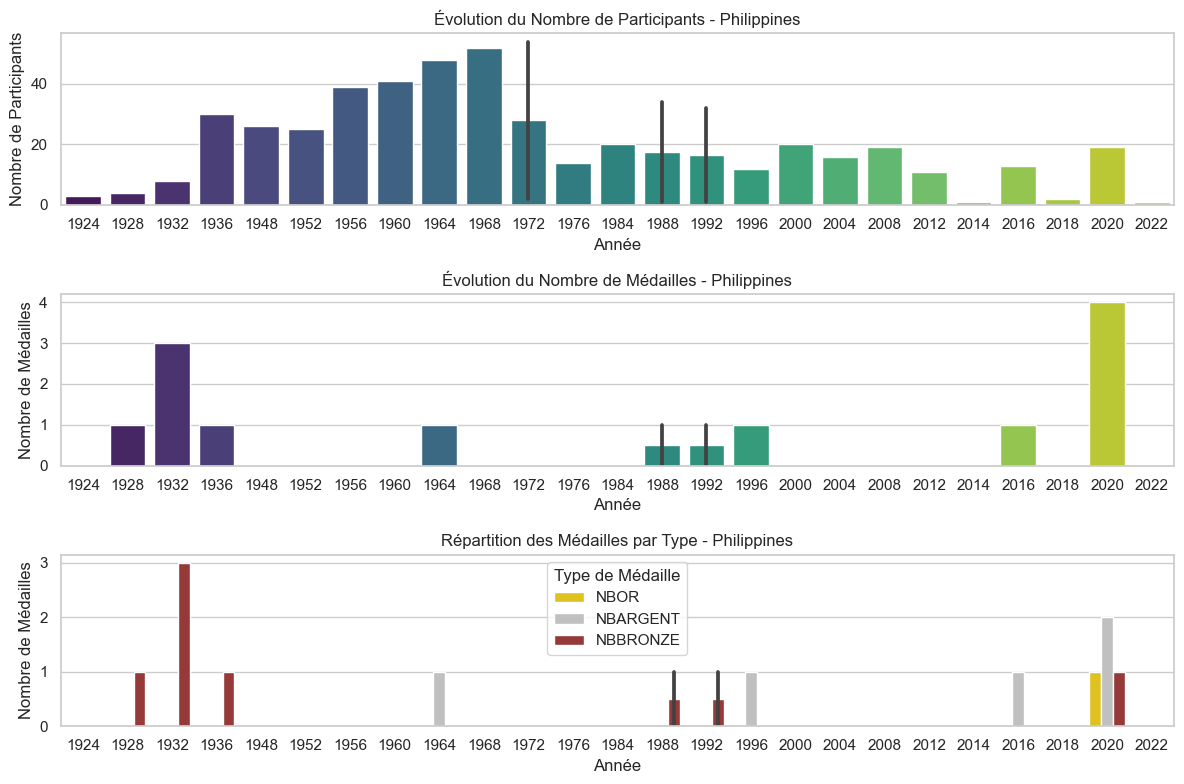

In [24]:
# Configurer le style de Seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

# Nombre d'athlÃ¨tes par Ã©dition
plt.subplot(3, 1, 1)
sns.barplot(x='ANNEEHOTE', y='NBPARTICIPANTS', data=data_historique, palette='viridis')
plt.title('Ã‰volution du Nombre de Participants - Philippines')
plt.xlabel('AnnÃ©e')
plt.ylabel('Nombre de Participants')

# Nombre de mÃ©dailles par Ã©dition
plt.subplot(3, 1, 2)
sns.barplot(x='ANNEEHOTE', y='NBMEDAILLESTOTAL', data=data_historique, palette='viridis')
plt.title('Ã‰volution du Nombre de MÃ©dailles - Philippines')
plt.xlabel('AnnÃ©e')
plt.ylabel('Nombre de MÃ©dailles')

# RÃ©partition des mÃ©dailles par type
plt.subplot(3, 1, 3)
data_melted = data_historique.melt(id_vars=['ANNEEHOTE'], value_vars=['NBOR', 'NBARGENT', 'NBBRONZE'], var_name='TypeMedaille', value_name='Nombre')
sns.barplot(x='ANNEEHOTE', y='Nombre', hue='TypeMedaille', data=data_melted, palette={'NBOR': 'gold', 'NBARGENT': 'silver', 'NBBRONZE': 'brown'})
plt.title('RÃ©partition des MÃ©dailles par Type - Philippines')
plt.xlabel('AnnÃ©e')
plt.ylabel('Nombre de MÃ©dailles')
plt.legend(title='Type de MÃ©daille')

plt.tight_layout()
plt.show()

Conclusion : pour la prochain édition, on peut penser que les Philippines feront un résultat similaire à la dernière édition d'été en 2020 au vu des la forte augmentation constaté durant l'édition 2020